We will use optimization to motivate the development of multivariate calculus.

In [14]:
using Pkg
Pkg.activate(pwd())
Pkg.instantiate()
Pkg.status()

  Activating project at `~/Documents/github.com/ucla-biostat-216/2023fall/slides/13-optim`


Status `~/Documents/github.com/ucla-biostat-216/2023fall/slides/13-optim/Project.toml`
  [f6369f11] ForwardDiff v0.10.36
  [b964fa9f] LaTeXStrings v1.3.1
  [91a5bcdd] Plots v1.39.0
  [37e2e46d] LinearAlgebra


In [15]:
using ForwardDiff, LinearAlgebra, Plots

## Multivariate calculus

- For a sufficiently smooth scalar function $f: \mathbb{R} \mapsto \mathbb{R}$, the **second order Taylor approximation** of $f$ at a point $z$ is
$$
f(x) \approx f(z) + f'(z) \cdot (x - z) + \frac 12 f''(z) \cdot (x - z)^2,
$$
where $f'(z) = \frac{d}{dx}f(x) \mid_{x=z}$ is the first derivative evaluated at $z$ and $f''(z) = \frac{d^2}{dx^2}f(x) \mid_{x=z}$ is the second derivative evaluated at $z$.

- Example: Consider function $f(x) = e^{2x} - x$. Its first derivative is
$$
\frac{d}{dx} f(x) = 2e^{2x} - 1.
$$
Its second derivative is
$$
\frac{d^2}{dx^2} f(x) = 4e^{2x}.
$$
Therefore the second order Taylor approximation of $f$ at a point $z=0$ is
$$
f(x) \approx 1 + 1 \cdot (x - 0) + \frac 12 \cdot 4 \cdot (x - 0)^2 = 1 + x + 2 x^2.
$$

f1(z) = 1.0
f2(z) = 4.0


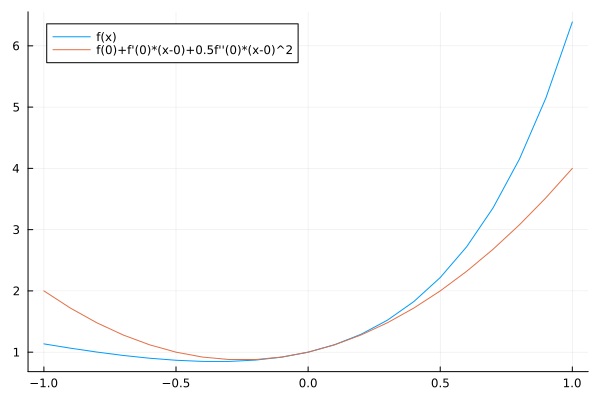

In [16]:
x = Vector(-1:0.1:1)
f(x) = exp(2x) - x
# draw the function
plt = plot(x, f.(x), label = "f(x)")
# draw the quadratic approximation at z=0
z = 0.0
f1(x) = ForwardDiff.derivative(f, x)
f2(x) = ForwardDiff.derivative(f1, x)
@show f1(z) # let computer calculate 1st derivative!
@show f2(z) # let computer calculate 2nd derivative!
f̂2 = f(z) .+ f1(z) .* (x .- z) .+ 0.5 .* f2(z) .* (x .- z).^2
plot!(plt, x, f̂2, label = "f(0)+f'(0)*(x-0)+0.5f''(0)*(x-0)^2", legend = :topleft)

- To generalize to a multivariate function $f: \mathbb{R}^n \mapsto \mathbb{R}$, we need notations:  
    - **Gradient**:
$$
\nabla f(\mathbf{x}) = \begin{pmatrix}
\frac{\partial}{\partial x_1} f(\mathbf{x}) \\
\vdots \\
\frac{\partial}{\partial x_n} f(\mathbf{x})
\end{pmatrix}.
$$  
    - **Hessian**:
$$
H(\mathbf{x}) = \nabla^2 f(\mathbf{x}) = \begin{pmatrix}
\frac{\partial^2}{\partial x_1^2} f(\mathbf{x}) & \cdots & \frac{\partial^2}{\partial x_1 \partial x_n} f(\mathbf{x}) \\
\vdots & \ddots & \vdots \\
\frac{\partial^2}{\partial x_n \partial x_1} f(\mathbf{x}) & \cdots & \frac{\partial^2}{\partial x_n^2} f(\mathbf{x})
\end{pmatrix}.
$$

- Example: Let $f(\mathbf{x}) = \frac 12 \mathbf{x}' \mathbf{S} \mathbf{x}$ for a fixed symmetric matrix $\mathbf{S}$. Then the gradient is
$$
\nabla f(\mathbf{x}) = \mathbf{S} \mathbf{x}
$$
and the Hessian is
$$
\nabla^2 f(\mathbf{x}) = \mathbf{S}.
$$

- For a sufficiently smooth multivariate function $f: \mathbb{R}^n \mapsto \mathbb{R}$, we have the **second-order Taylor approximation** of $f$ at $\mathbf{z}$:  
$$
f(\mathbf{x}) \approx f(\mathbf{z}) + \nabla f(\mathbf{z})' (\mathbf{x} - \mathbf{z}) + \frac 12 (\mathbf{x} - \mathbf{z})' [\nabla^2 f(\mathbf{z})] (\mathbf{x} - \mathbf{z}).
$$

- An example with $n=2$: The gradient of 
$$
f(\mathbf{x}) = f(x_1, x_2) = e^{2x_1 + x_2} - x_1
$$
is
$$
\nabla f(\mathbf{x}) = \begin{pmatrix}
2 e^{2x_1 + x_2} - 1\\
e^{2x_1 + x_2}
\end{pmatrix}
$$
and the Hessian is
$$
\nabla^2 f(\mathbf{x}) = \begin{pmatrix}
4 e^{2x_1 + x_2} & 2 e^{2x_1 + x_2}\\
2e^{2x_1 + x_2} & e^{2x_1 + x_2}
\end{pmatrix}.
$$
Then the second-order Taylor approximation of $f$ at a point $\mathbf{z}$ is
$$
f(\mathbf{x}) \approx e^{2z_1 + z_2} - z_1 + \begin{pmatrix}
2 e^{2z_1 + z_2} - 1 \,\,
e^{2z_1 + z_2}
\end{pmatrix} \begin{pmatrix} x_1 - z_1 \\ x_2 - z_2 \end{pmatrix} + \frac 12 (x_1 - z_1 \quad x_2 - z_2) \begin{pmatrix}
4 e^{2z_1 + z_2} & 2 e^{2z_1 + z_2}\\
2e^{2z_1 + z_2} & e^{2z_1 + z_2}
\end{pmatrix} \begin{pmatrix} x_1 - z_1 \\ x_2 - z_2 \end{pmatrix}.
$$

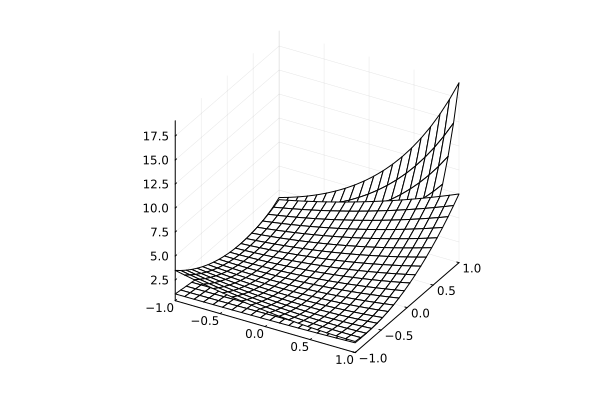

In [17]:
# a non-linear function f
g(x) = exp(2x[1] + x[2]) - x[1]
# define grid
n = 20
grid = range(-1, 1, length = n)
# draw the second-order approximation at (0,0)
z = [0.0, 0.0]
g1(x) = ForwardDiff.gradient(g, x)
g2(x) = ForwardDiff.hessian(g, x)
g_approx(x) = g(z) + g1(z)' * (x - z) + 0.5 * (x - z)' * g2(z) * (x - z)
ĝx = [g_approx([grid[row], grid[col]]) for row in 1:n, col in 1:n]
# draw the function
gx = [g([grid[row], grid[col]]) for row in 1:n, col in 1:n]
plt = wireframe(grid, grid, gx, label="fhat", fillalpha = 0.5)
plt = wireframe!(plt, grid, grid, ĝx, label="f", fillalpha = 0.5)

## Chain rule for multivariate calculus

* Deriving derivative and Hessian of functions with vector or matrix argument can be frustrating. The key is to adopt a consistent notation that enables chain rule. Familiarize yourself with the content of this [lecture](https://ucla-biostat216-2019fall.github.io/slides/16-matrixcalc/16-matrixcalc.html). It can be one of the most useful notes for your graduate study and research projects.

* Some notations such as Kronecker product and commutation matrix appear in the above lecture note. Basic properties of these matrices are summarized in this [lecture note](https://ucla-biostat216-2019fall.github.io/slides/13-kron/13-kron.html).

* We will practice use of these results in homework problems.

* Example: Take derivative of the [Rayleigh quotient](https://ucla-biostat-216.github.io/2023fall/slides/12-svd/12-svd.html#singular-vectors-and-rayleigh-quotient).

* Example: Take derivative of the function $f(\mathbf{C}, \mathbf{R}) = \|\mathbf{A} - \mathbf{C} \mathbf{R}\|_{\text{F}}^2$ in the proof of the [Eckart-Young theorem](https://ucla-biostat-216.github.io/2023fall/slides/12-svd/12-svd.html#eckart-young-theorem-best-approximation-to-a-matrix).

* Example: [HW6 Q17](https://ucla-biostat-216.github.io/2023fall/hw/hw6/hw6.html#q17-mle-of-multivariate-normal). Take derivative of the multivariate normal log-density.

* Example: [HW6 Q20](https://ucla-biostat-216.github.io/2023fall/hw/hw6/hw6.html#q20-procrustes-rotation). Take derivative of the Procrustes criterion function.

* Example: [HW6 Q22](https://ucla-biostat-216.github.io/2023fall/hw/hw6/hw6.html#q22-factor-analysis). Take derivative of the factor analysis log-likelihood function. Hint: The answer is
\begin{eqnarray*}
    \frac{\partial \ell(\mathbf{F}, \mathbf{D})}{\partial \mathbf{F}} = - \frac n2 \boldsymbol{\Omega}^{-1} \mathbf{F} + \frac n2 \boldsymbol{\Omega}^{-1} \mathbf{S} \boldsymbol{\Omega}^{-1} \mathbf{F}
\end{eqnarray*}
and
\begin{eqnarray*}
    \frac{\partial \ell(\mathbf{F}, \mathbf{D})}{\partial \mathbf{D}} = - \frac n2 \text{diag} (\boldsymbol{\Omega}^{-1} -\boldsymbol{\Omega}^{-1} \mathbf{S} \boldsymbol{\Omega}^{-1}),
\end{eqnarray*}
where $\boldsymbol{\Omega} = \mathbf{F} \mathbf{F}' + \mathbf{D}$.

## Optimization and optimality conditions

- Optimization aims to minimize a multivariate function $f: \mathbb{R}^n \mapsto \mathbb{R}$ possibly subject to certain constraints. Possible constrains include  
    - Linear constraints: $\mathbf{A} \mathbf{x} = \mathbf{b}$.  
    - Inequality constraints: $\mathbf{x} \ge \mathbf{0}$.  
    - Integer constraints: Each $x_i$ is either 0 or 1.
    
- Statisticians often talk about *maximization*, because of the maximum likelihood estimation (MLE). Note maximizing $f$ is same as minimizing $-f$. 

- Local minimum, strict local minimum, and global minimum:

![](./local_optim.png)

- For unconstrained optimization of a scalar function $f$, we know
    - the necessary condition for a point $x$ to be a local minimum is $\frac{d}{dx} f(x)= 0$.  
    - a sufficient condition for a strict local minimum is (1) $\frac{d}{dx} f(x) = 0$ and (2) $\frac{d^2}{dx^2} f(x) > 0$.  
    These are called the **optimality conditions**.  
    
- Similarly for unconstrained optimization of a multivariate function $f: \mathbb{R}^n \mapsto \mathbb{R}$,
    - the necessary condition for a point $\mathbf{x}$ to be a local minimum is
$$
\nabla f(\mathbf{x}) = \mathbf{0}_n.
$$
Points with zero gradients are called the **critical points**.  
    - a sufficient condition for a strict local minimum is
$$
\nabla f(\mathbf{x}) = \mathbf{0}_n
$$
and
$$
\nabla^2 f(\mathbf{x}) \succ \mathbf{O}_{n \times n}.
$$

- A body of work in optimization is to generalize these optimality conditions to the constrained case.

## Convexity

- Convexity plays a key role in optimization. 

- A **convex set $\mathcal{K}$**: If $\mathbf{x}, \mathbf{y} \in \mathcal{K}$, then the line from $\mathbf{x}$ to $\mathbf{y}$ is contained in $\mathcal{K}$. That is $\{\alpha \mathbf{x} + (1 - \alpha) \mathbf{y}: \alpha \in [0, 1]\} \subseteq \mathcal{K}$.  

![](./convex_nonconvex_sets.png)

- Examples of convex sets: line segment, $n$-ball in $\mathbb{R}^n$, the set of positive (semi)definite matrices, ...

- A **convex function $f$**: 
$$
f(\alpha \mathbf{x} + (1 - \alpha) \mathbf{y}) \le \alpha f(\mathbf{x}) + (1 - \alpha) f(\mathbf{y})
$$
for all $\mathbf{x}, \mathbf{y}$ and $\alpha \in (0, 1)$.

- A **strictly convex function** satisifies above definition but replacing $\le$ by $<$.  

    $f$ is (strictly) **concave** if $-f$ is strictly convex. 

- Examples of convex functions: $f_1(x) = ax + b$, $f_2(x) = x^2$, $f_3(x) = \max\{f_1(x), f_2(x)\}$, $f_4(\mathbf{x}) = \mathbf{x}' \mathbf{A} \mathbf{x}$ where $\mathbf{A}$ is positive semidefinite, $f_5(\mathbf{A}) = - \log \det \mathbf{A}$ for positive definite $\mathbf{A}$, ... 

    It is extremely useful to maintain your own catalog of convex functions. In general, we need at least one quarter of course to train in recognizing convexity and convex optimization problems, e.g., UCLA EE236B.  

- (Alternative **epigraph** definition of convexity) A function $f$ is convex if and only if the set of points on and above the graph of $f$, i.e., the epigraph set $\text{epi} f = \{(\mathbf{x},y): f(\mathbf{x}) \le y\}$, is convex. 

    Proof of "if" part: Apparently $(\mathbf{x}_1, f(\mathbf{x}_1))$ and $(\mathbf{x}_2, f(\mathbf{x}_2))$ belong to the epigraph. By the convexity of the epigraph, we have $(\alpha \mathbf{x}_1 + (1-\alpha) \mathbf{x}_2, \alpha_1 f(\mathbf{x}_1) + (1-\alpha) f(\mathbf{x}_2))$ belongs to the epigraph. That is
    $$
    f(\alpha \mathbf{x}_1 + (1-\alpha) \mathbf{x}_2) \le \alpha_1 f(\mathbf{x}_1) + (1-\alpha) f(\mathbf{x}_2).
    $$

    Proof of "only if" part: If $f(\mathbf{x}_1) \le y_1$ and $f(\mathbf{x}_2) \le y_2$, then
    $$
    f(\alpha \mathbf{x}_1 + (1 - \alpha) \mathbf{x}_2) \le \alpha f(\mathbf{x}_1) + (1 - \alpha) f(\mathbf{x}_2) \le \alpha_1 y_1 + \alpha_2 y_2, \quad \alpha \in [0, 1],
    $$
    where the first $\le$ is by convexity of $f$. Thus $\alpha \mathbf{x}_1 + (1 - \alpha) \mathbf{x}_2$ is in the epigraph set.

![](./epigraph.png)

- **Intersection of convex sets is convex.**

    Proof: HW6 Q14.1.

- **The maximum of two or more (potentially infinitely many) convex functions is always convex.**  

    (Algebraic) proof: Let $f(\mathbf{x}) = \sup_{i \in \mathcal{I}} f_i (\mathbf{x})$. Then
$$
f_i(\alpha \mathbf{x} + (1 - \alpha) \mathbf{y}) \le \alpha f_i(\mathbf{x}) + (1 - \alpha) f_i(\mathbf{y}) \le \alpha f(\mathbf{x}) + (1 - \alpha) f(\mathbf{y})
$$
for all $i \in \mathcal{I}$. Taking supremum over $i$ on the left hand side yields
$$
f(\alpha \mathbf{x} + (1 - \alpha) \mathbf{y}) \le \alpha f(\mathbf{x}) + (1 - \alpha) f(\mathbf{y}).
$$

    (Geometric) proof: HW6 Q14.2.

    Note the minimum of convex functions is usually not convex.   
        
- (**Support hyperplane inequality**, **first-order condition for convexity**) For a differentiable and convex $f$,
    $$
    f(\mathbf{x}) \ge f(\mathbf{y}) + \nabla f(\mathbf{y})' (\mathbf{x} - \mathbf{y})
    $$ 
    for all $\mathbf{x}, \mathbf{y}$. 

- A convex function sits between its tangent lines and its chords.    

![](./convex_plot.png)

- (Second derivative test) A twice differentiable function is convex if $\nabla^2 f(\mathbf{x}) \succeq \mathbf{O}_{n \times n}$ at all $\mathbf{x}$. It is strictly convex if $\nabla^2 f(\mathbf{x}) \succ \mathbf{O}_{n \times n}$ at all $\mathbf{x}$.

- For a convex function, any stationary point with $\nabla f(\mathbf{x}) = \mathbf{0}$ is a global minimum.

    Proof: Supporting hyperplane inequality.

- * Example: [HW6 Q17](https://ucla-biostat-216.github.io/2023fall/hw/hw6/hw6.html#q17-mle-of-multivariate-normal). MLE of the multivariate normal model.    

## Lagrange multiplier method for constrained optimization

- We only consider equality constraint here.

- Example:
\begin{eqnarray*}
    &\text{minimize}& f(x_1,x_2) = x_1^2 + x_2^2 \\
    &\text{subject to}& a_1 x_1 + a_2 x_2 = b.
\end{eqnarray*}
Define the **Lagrangian**
$$
L(x_1, x_2, \lambda) = f(x_1, x_2) + \lambda (a_1 x_1 + a_2 x_2 - b) = x_1^2 + x_2^2 + \lambda (a_1 x_1 + a_2 x_2 - b),
$$
where $\lambda$ is the **Lagrange multiplier**. Solve the equations
\begin{eqnarray*}
\frac{\partial}{\partial x_1} L &=& 2 x_1 + \lambda a_1 = 0 \\
\frac{\partial}{\partial x_2} L &=& 2 x_2 + \lambda a_2 = 0 \\
\frac{\partial}{\partial \lambda} L &=& a_1 x_1 + a_2 x_2 - b = 0
\end{eqnarray*}
to get optimal $x_1$, $x_2$, and $\lambda$:
\begin{eqnarray*}
x_1^\star &=& \frac{a_1 b}{a_1^2 + a_2^2} \\
x_2^\star &=& \frac{a_2 b}{a_1^2 + a_2^2} \\
\lambda^\star &=& - \frac{2b}{a_1^2 + a_2^2}
\end{eqnarray*}
with optimal objective value
$$
(x_1^\star)^2 + (x_2^\star)^2 = \frac{b^2}{a_1^2 + a_2^2}.
$$
We found **$-\lambda^\star$ is simply the derivative of the minimum cost with respect to the constraint level $b$**
$$
\frac{d}{d b} \left( \frac{b^2}{a_1^2 + a_2^2} \right) = \frac{2b}{a_1^2 + a_2^2} = - \lambda.
$$

- We generalize above example to the general problem of **minimizing a convex quadratic function with linear constraints**. For $\mathbf{S} \succ \mathbf{0}$ and $\mathbf{A} \in \mathbb{R}^{n \times m}$,
\begin{eqnarray*}
    &\text{minimize}& \frac 12 \mathbf{x}' \mathbf{S} \mathbf{x} \\
    &\text{subject to}& \mathbf{A}' \mathbf{x} = \mathbf{b}.
\end{eqnarray*}
The **Lagrangian** function is
$$
L(\mathbf{x}, \boldsymbol{\lambda}) = \frac 12 \mathbf{x}' \mathbf{S} \mathbf{x} + \boldsymbol{\lambda}' (\mathbf{A}' \mathbf{x} - \mathbf{b}),
$$
where $\boldsymbol{\lambda} \in \mathbb{R}^m$ is the **Lagrange multipliers**. Solving equations
\begin{eqnarray*}
    \nabla_\mathbf{x} L(\mathbf{x}, \boldsymbol{\lambda}) &=& \mathbf{S} \mathbf{x} + \mathbf{A} \boldsymbol{\lambda} = \mathbf{0}_n \\
    \nabla_\boldsymbol{\lambda} L(\mathbf{x}, \boldsymbol{\lambda}) &=& \mathbf{A}' \mathbf{x} - \mathbf{b} = \mathbf{0}_m,
\end{eqnarray*}
or equivalently
$$
\begin{pmatrix}
\mathbf{S} & \mathbf{A} \\
\mathbf{A}' & \mathbf{O}
\end{pmatrix} \begin{pmatrix} \mathbf{x} \\ \boldsymbol{\lambda} \end{pmatrix} = \begin{pmatrix} \mathbf{0}_n \\ \mathbf{b} \end{pmatrix} \quad \quad (\text{saddle point matrix or KKT matrix})
$$
yields the solution
\begin{eqnarray*}
\mathbf{x}^\star &=& \mathbf{S}^{-1} \mathbf{A} (\mathbf{A}' \mathbf{S}^{-1} \mathbf{A})^{-1} \mathbf{b} \\
\boldsymbol{\lambda}^\star &=& - (\mathbf{A}' \mathbf{S}^{-1} \mathbf{A})^{-1} \mathbf{b}.
\end{eqnarray*}
Further calculation shows the minimum cost
$$
f^\star = \frac 12 \mathbf{b}' (\mathbf{A}' \mathbf{S}^{-1} \mathbf{A})^{-1} \mathbf{b}
$$
and the gradient of cost
$$
\nabla_\mathbf{b} f^\star = (\mathbf{A}' \mathbf{S}^{-1} \mathbf{A})^{-1} \mathbf{b} = - \boldsymbol{\lambda}^\star.
$$

- The saddle point matrix (or KKT matrix) has $n$ positive eigenvalues and $m$ negative eigenvalue. The Lagrangian function is convex in $\mathbf{x}$ and concave in $\boldsymbol{\lambda}$.


### Example: MLE of multinomial model

Consider a multinomial experiment with $n$ trials and observed outcomes $n_1, \ldots, n_m$ over $m$ categories. The maximum likelihood estimate (MLE) seeks maximizer of likelihood  
$$
L(p_1,\ldots,p_m) = \binom{n}{n_1 \cdots n_m} \prod_{i=1}^m p_i^{n_i}.
$$
To maximize the log-likelihood  
$$
\log L(p_1,\ldots,p_m) = \log \binom{n}{n_1 \cdots n_m} + \sum_{i=1}^m n_i \log p_i
$$
subject to the constraint $p_1 + \cdots + p_m = 1$, we find the stationary point of Lagrangian  
$$
L(p_1,\ldots,p_m, \lambda) = - \log \binom{n}{n_1 \cdots n_m} - \sum_{i=1}^m n_i \log p_i + \lambda \left( \sum_{i=1}^m p_i - 1 \right).
$$  
Solving  
$$
\frac{\partial L}{\partial p_i} = - \frac{n_i}{p_i} + \lambda = 0
$$  
gives  
$$
\frac{n_i}{p_i} = \lambda.
$$  
Combining with the constraint $\sum_i p_i=1$ yields  
\begin{eqnarray*}
p_i^\star &=& \frac{n_i}{n}, \quad i=1,\ldots,m, \\
\lambda^\star &=& n.
\end{eqnarray*}
Note the nonnegativity constraint is automatically satisfied.

### Example: [HW6, Q18](https://ucla-biostat-216.github.io/2023fall/hw/hw6/hw6.html#q18-smallest-matrix-subject-to-linear-constraints) (Smallest matrix subject to linear constraints)

### Example: [HW6, Q19](https://ucla-biostat-216.github.io/2023fall/hw/hw6/hw6.html#q19-minimizing-a-convex-quadratic-form-over-manifold) (Minimizing a convex quadratic form over manifold)

## Newton-Raphson method for optimization

- We are looking for a point $\mathbf{x}^\star$ such that $\nabla f(\mathbf{x}^\star) = \mathbf{0}$. Multivariate calculus gives us a principled way to move towards such an $\mathbf{x}^\star$.

- **Second-order Taylor approximation** to a function $f$ at current iterate $\mathbf{x}^{(t)}$ says
$$
f(\mathbf{x}^{(t)} + \Delta \mathbf{x}) \approx f(\mathbf{x}^{(t)}) + \nabla f(\mathbf{x}^{(t)})' \Delta \mathbf{x} + \frac 12 \Delta \mathbf{x}' [\nabla^2 f(\mathbf{x}^{(t)})] \Delta \mathbf{x}.
$$
Which direction $\Delta \mathbf{x}$ shall we move from $\mathbf{x}^{(t)}$? 

    Minimizing the quadratic approximation gives the **Newton direction**
$$
\Delta \mathbf{x}_{\text{newton}} = - [\nabla^2 f(\mathbf{x}^{(t)})]^{-1} \nabla f(\mathbf{x}^{(t)}).
$$

- So the **Newton method** iterates according to
$$
\mathbf{x}^{(t+1)} = \mathbf{x}^{(t)} + \Delta \mathbf{x}_{\text{newton}} = \mathbf{x}^{(t)} - [\nabla^2 f(\mathbf{x}^{(t)})]^{-1} \nabla f(\mathbf{x}^{(t)}).
$$

- Quadratic convergence of Newton's method:
$$
\|\mathbf{x}^{(t+1)} - \mathbf{x}^\star\| \le C \|\mathbf{x}^{(t)} - \mathbf{x}^\star\|^2.
$$

- Example: $f(x) = \frac 13 x^3 - 4x$ with $\nabla f(x) = x^2 - 4$ and $\nabla^2 f(x) = 2x$. Newton's iterates are 
$$
x^{(t+1)} = x^{(t)} - \frac{x^{(t)2}-4}{2x^{(t)}} = \frac{1}{2} \left( x^{(t)} + \frac{4}{x^{(t)}} \right).
$$
Let's start from $x^{(0)}=2.5$.

In [18]:
x = 2.5
for iter in 1:5
    x = 0.5 * (x + 4 / x)
    @show x, x^3 / 3 - 4x
end

(x, x ^ 3 / 3 - 4x) = (2.05, -5.328291666666667)
(x, x ^ 3 / 3 - 4x) = (2.000609756097561, -5.333332589652766)
(x, x ^ 3 / 3 - 4x) = (2.0000000929222947, -5.333333333333316)
(x, x ^ 3 / 3 - 4x) = (2.000000000000002, -5.333333333333334)
(x, x ^ 3 / 3 - 4x) = (2.0, -5.333333333333334)


$$
x^{(t+1)} - 2 = \frac 12 \left( x^{(t)} + \frac{4}{x^{(t)}} \right) - 2 = \frac{1}{2x^{(t)}} \left( x^{(t)} - 2 \right)^2
$$

- In practice, the Newton's method may suffer from **instability**; the iterates may escape into infinities or a local maximum. Two remedies are needed:  
    1. Use a positive definite matrix in the quadratic approximation (automatically satisfied by the Hessian of a convex function). 
    2. Line search (backtracking) to guarantee sufficient drop in the objective function.
\begin{eqnarray*}
& & f(\mathbf{x}^{(t)} + s \Delta \mathbf{x}) - f(\mathbf{x}^{(t)}) \\
&=& f(\mathbf{x}^{(t)}) + s \cdot \nabla f(\mathbf{x}^{(t)})' \Delta \mathbf{x} + o(s) - f(\mathbf{x}^{(t)}) \\
&=& - s \cdot \nabla f(\mathbf{x}^{(t)})' [\nabla^2 f(\mathbf{x}^{(t)})]^{-1} \nabla f(\mathbf{x}^{(t)}) + o(s) \\
&<& 0
\end{eqnarray*}
when $\nabla^2 f(\mathbf{x}^{(t)})$ is pd and $s$ is small.

## Gradient descent

- If we use the identity matrix as a very crude approximation of the Hessian matrix, we obtain the classical **gradient descent**, or **steepest descent**, algorithm:
$$
\mathbf{x}^{(t+1)} = \mathbf{x}^{(t)} - s^{(t)} \nabla f(\mathbf{x}^{(t)}).
$$

- Gradient descent algorithm is gaining tremendous of interest in modern, large scale optimization problems, because calculation of Hessian is usually quite expensive. 

- Example: minimize a bivariate quadratic function:
$$
f(x_1, x_2) = \frac 12 (x_1^2 + bx_2^2).
$$
Gradient:
$$
\nabla f(x_1, x_2) = \begin{pmatrix} x_1 \\ bx_2 \end{pmatrix}.
$$
Gradient descent algorithm:
\begin{eqnarray*}
\begin{pmatrix} x_1^{(t+1)} \\ x_2^{(t+1)} \end{pmatrix} &=& \begin{pmatrix} x_1^{(t)} \\ x_2^{(t)} \end{pmatrix} - s^{(t)} \begin{pmatrix} x_1^{(t)} \\ bx_2^{(t)} \end{pmatrix} \\
&=& \begin{pmatrix} (1 - s^{(t)}) x_1^{(t)} \\ (1 - bs^{(t)})x_2^{(t)} \end{pmatrix}.
\end{eqnarray*}
What's the optimal step length $s$ (exact line search)? The objective function
$$
f(s) = \frac 12 \left[(1-s)^2 x_1^{(t)2} + b(1-bs)^2x_2^{(t)2} \right]
$$
is minimized at
$$
s^{(t)} = \frac{x_1^{(t)2} + b^2 x_2^{(t)2}}{x_1^{(t)2} + b^3 x_2^{(t)2}}.
$$
Let's assume starting point $(x_1^{(0)}, x_2^{(0)}) = (b, 1)$ to simplify analysis. Then
$$
s^{(0)} = \frac{b^2 + b^2}{b^2 + b^3} = \frac{2}{b + 1}
$$
and
$$
\begin{pmatrix} x_1^{(1)} \\ x_2^{(1)} \end{pmatrix} = \begin{pmatrix} \left( \frac{b-1}{b+1} \right) x_1^{(1)} \\ \left( \frac{1-b}{b+1} \right) x_2^{(1)} \end{pmatrix} = \begin{pmatrix} b \left( \frac{b-1}{b+1} \right) \\ \left( \frac{1-b}{b+1} \right) \end{pmatrix}.
$$
Continuing this way, we found
$$
\begin{pmatrix} x_1^{(t)} \\ x_2^{(t)} \end{pmatrix} = \begin{pmatrix} b \left( \frac{b-1}{b+1} \right)^t \\ \left( \frac{1-b}{b+1} \right)^t \end{pmatrix}
$$
and
$$
f(x_1^{(t)}, x_2^{(t)}) = \frac 12 (1 + b^2) \left( \frac{b-1}{b+1} \right)^{2t} = \left( \frac{b-1}{b+1} \right)^{2t} f(x_1^{(0)}, x_2^{(0)}).
$$

    Following graph shows the zig-zagging pattern of the gradient descent iterates:  
<img src="./gd.gif" width=600 align="center"/>

In [19]:
using Plots; gr()
using LaTeXStrings

b = 0.1
f(x1, x2) = 0.5 * (x1^2 + b * x2^2)
s = 2 / (1 + b) # optimal step length
x1, x2 = b, 1.0   # start point
x1iter, x2iter, fiter = [x1], [x2], [f(x1, x2)]  # store function values
for iter in 1:15
    x1 *= (1 - s)
    x2 *= (1 - s * b)
    push!(x1iter, x1)
    push!(x2iter, x2)
    push!(fiter, f(x1, x2))
end

x1 = -1:0.01:1
x2 = -1:0.01:1
X1 = repeat(reshape(x1, 1, :), length(x2), 1)
X2 = repeat(x2, 1, length(x1))
Z = map(f, X1, X2)
p = contour(x1, x2, Z, levels=fiter)
plot(p, xlabel=L"x_1", ylabel=L"x_2", title="GD");

In [20]:
anim = @animate for iter in 1:length(x1iter)-1
    Plots.plot!(p, x1iter[iter:iter+1], x2iter[iter:iter+1], shape=:circle)
    Plots.annotate!(p, x1iter[iter], x2iter[iter], text(latexstring("x^{($iter)}"), :right))
end
gif(anim, "./gd.gif", fps = 1);

┌ Info: Saved animation to /Users/huazhou/Documents/github.com/ucla-biostat-216/2023fall/slides/13-optim/gd.gif
└ @ Plots /Users/huazhou/.julia/packages/Plots/sxUvK/src/animation.jl:156


- Above analysis can be generalized to a general **strongly convex** function that satisfies
$$
m \mathbf{I}_n \preceq \nabla^2 f(\mathbf{x}) \preceq M \mathbf{I}_n \text{ for all } \mathbf{x}
$$
for some constants $M > m > 0$. Or equivalently all eigenvalues of $\nabla^2 f(\mathbf{x})$ are in $[m, M]$.

    Theorem: for any strongly convex function $f$, the gradient descent with exact line search satisfies
$$
f(\mathbf{x}^{(t+1)}) - f(\mathbf{x}^\star) \le \left( 1 - \frac mM \right) [f(\mathbf{x}^{(t)}) - f(\mathbf{x}^\star)],
$$
where $\mathbf{x}^\star$ is the optimum.

- In practice, we often perform inexact line search such as backtracking, because exact line search is expensive.

## Gradient descent with momentum

- To mitigate the frustrating zig-zagging of gradient descent, Polyak proposed to add a **momentum** with coefficient $\beta$ to the gradient. The idea is that a heavy ball rolling downhill has less zig-zagging.

- **Gradient descent with momentum**:  
\begin{eqnarray*}
    \mathbf{x}^{(t+1)} &=& \mathbf{x}^{(t)} - s \mathbf{z}^{(t)} \text{ with } \\
    \mathbf{z}^{(t)} &=& \nabla f(\mathbf{x}^{(t)}) + \beta \mathbf{z}^{(t-1)}.
\end{eqnarray*}

- For a quadratic objective function
$$
f(\mathbf{x}) = \frac 12 \mathbf{x}' \mathbf{S} \mathbf{x}.
$$
The optimal step length $s$ and  momentum coefficient $\beta$ are given by (derivation omitted)
\begin{eqnarray*}
s = \left( \frac{2}{\sqrt{\lambda_{\text{max}}} +  \sqrt{\lambda_{\text{min}}}} \right)^2 \\
\beta = \left( \frac{\sqrt{\lambda_{\text{max}}} -  \sqrt{\lambda_{\text{min}}}}{\sqrt{\lambda_{\text{max}}} +  \sqrt{\lambda_{\text{min}}}} \right)^2,
\end{eqnarray*}
where $\lambda_{\text{min}}$ and $\lambda_{\text{max}}$ are the minimum and maximum eigenvalues of $\mathbf{S}$.

- Back to our 2-dimensional example $f(x_1, x_2) = \frac 12 (x_1^2 + b x_2^2)$. We have
$$
s = \left( \frac{2}{1+\sqrt b} \right)^2, \quad \beta = \left( \frac{1 - \sqrt b}{1 + \sqrt b} \right)^2,
$$
and
$$
f(x_1^{(t)}, x_2^{(t)}) = \left( \frac{1 - \sqrt b}{1 + \sqrt b} \right)^{2t} f(x_1^{(0)}, x_2^{(0)}).
$$
The convergence rate improves from $\left( \frac{1 - b}{1 + b} \right)^{2}$ to $\left( \frac{1 - \sqrt b}{1 + \sqrt b} \right)^{2}$.

    Following graph shows the iterates of gradient descent with momentum:  
<img src="./gd_momentum.gif" width=600 align="center"/>

In [21]:
b = 0.1
f(x1, x2) = 0.5 * (x1^2 + b * x2^2)
s = (2 / (1 + sqrt(b)))^2             # optimal step length
β = ((1 - sqrt(b)) / (1 + sqrt(b)))^2 # optimal momentum coefficient
x1, x2 = b, 1.0   # start point
z1, z2 = [0.0, 0.0]
x1iter, x2iter, fiter = [x1], [x2], [f(x1, x2)]  # store function values
for iter in 1:15
    z1 = x1 + β * z1
    z2 = b * x2 + β * z2
    x1 -= s * z1
    x2 -= s * z2
    push!(x1iter, x1)
    push!(x2iter, x2)
    push!(fiter, f(x1, x2))
end

x1 = -1:0.01:1
x2 = -1:0.01:1
X1 = repeat(reshape(x1, 1, :), length(x2), 1)
X2 = repeat(x2, 1, length(x1))
Z = map(f, X1, X2)
p = contour(x1, x2, Z, levels=fiter)
plot(p, xlabel=L"x_1", ylabel=L"x_2", title="GD with Momentum");

In [22]:
anim = @animate for iter in 1:length(x1iter)-1
    Plots.plot!(p, x1iter[iter:iter+1], x2iter[iter:iter+1], shape=:circle)
    Plots.annotate!(p, x1iter[iter], x2iter[iter], text(latexstring("x^{($iter)}"), :right))
end
gif(anim, "./gd_momentum.gif", fps = 1);

┌ Info: Saved animation to /Users/huazhou/Documents/github.com/ucla-biostat-216/2023fall/slides/13-optim/gd_momentum.gif
└ @ Plots /Users/huazhou/.julia/packages/Plots/sxUvK/src/animation.jl:156


## Nesterov acceleration of gradient descent

- Yuri Nesterov proposed that, instead of evaluating the gradient $\nabla f$ at current iterate $\mathbf{x}^{(t)}$, we shift the evaluation point to $\mathbf{x}^{(t)} + \gamma (\mathbf{x}^{(t)} - \mathbf{x}^{(t-1)})$.

- **Nesetrov accelerated gradient descent**
\begin{eqnarray*}
\mathbf{x}^{(t+1)} &=& \mathbf{x}^{(t)} - s \nabla f(\mathbf{y}^{(t)}) \\
\mathbf{y}^{(t+1)} &=& \mathbf{x}^{(t+1)} + \gamma (\mathbf{x}^{(t+1)} - \mathbf{x}^{(t)}).
\end{eqnarray*}

- For a quadratic objective function
$$
f(\mathbf{x}) = \frac 12 \mathbf{x}' \mathbf{S} \mathbf{x}.
$$
The optimal step length $s$ and $\gamma$ are given by (derivation omitted)
\begin{eqnarray*}
s &=& \frac{1}{\lambda_{\text{max}}} \\
\gamma &=& \frac{\sqrt{\lambda_{\text{max}}} -  \sqrt{\lambda_{\text{min}}}}{\sqrt{\lambda_{\text{max}}} +  \sqrt{\lambda_{\text{min}}}},
\end{eqnarray*}
where $\lambda_{\text{min}}$ and $\lambda_{\text{max}}$ are the minimum and maximum eigenvalues of $\mathbf{S}$.

- The convergence rate improves from $\left( \frac{1 - b}{1 + b} \right)^{2}$ to $1 - \sqrt b$.

<img src="./gd_nesterov.gif" width=600 align="center"/>

In [23]:
b = 0.1
f(x1, x2) = 0.5 * (x1^2 + b * x2^2)
s = 1.0                           # optimal step length
γ = (1 - sqrt(b)) / (1 + sqrt(b)) # optimal Nesterov constant
x1, x2 = b, 1.0   # start point
y1, y2 = x1, x2
x1iter, x2iter, fiter = [x1], [x2], [f(x1, x2)]  # store iterates
for iter in 1:15
    x1prev, x2prev = x1, x2
    x1 = y1 - s * y1
    x2 = y2 - s * b * y2
    y1 = x1 + γ * (x1 - x1prev)
    y2 = x2 + γ * (x2 - x2prev)
    push!(x1iter, x1)
    push!(x2iter, x2)
    push!(fiter, f(x1, x2))
end

x1 = -1:0.01:1
x2 = -1:0.01:1
X1 = repeat(reshape(x1, 1, :), length(x2), 1)
X2 = repeat(x2, 1, length(x1))
Z = map(f, X1, X2)
p = contour(x1, x2, Z, levels=fiter)
plot(p, xlabel=L"x_1", ylabel=L"x_2", title="GD with Nesterov");

In [24]:
anim = @animate for iter in 1:length(x1iter)-1
    Plots.plot!(p, x1iter[iter:iter+1], x2iter[iter:iter+1], shape=:circle)
    Plots.annotate!(p, x1iter[iter], x2iter[iter], text(latexstring("x^{($iter)}"), :right))
end
gif(anim, "./gd_nesterov.gif", fps = 1);

┌ Info: Saved animation to /Users/huazhou/Documents/github.com/ucla-biostat-216/2023fall/slides/13-optim/gd_nesterov.gif
└ @ Plots /Users/huazhou/.julia/packages/Plots/sxUvK/src/animation.jl:156


## Stochastic gradient descent

- In machine learning and statistics, we need to minimize the loss function of training data
$$
L(\mathbf{x}) = \frac 1N \sum_{i=1}^N \ell(\mathbf{x}, \mathbf{v}_i),
$$
where $\mathbf{x}$ is the parameter to be fitted, $N$ is the training sample size, and $\mathbf{v}_i$ is the $i$-th sample.

    For example, in leasts squares problem, we minimize
$$
L(\mathbf{x}) = \frac 1N \|\mathbf{b} - \mathbf{A} \mathbf{x}\|^2 = \frac 1N \sum_{i=1}^N (b_i - \mathbf{a}_i' x)^2.
$$

- Issues of the (classical) gradient descent scheme
$$
\mathbf{x}^{(t+1)} = \mathbf{x}^{(t)} - s^{(t)} \nabla L(\mathbf{x}).
$$
include:  
    1. Evaluating $\nabla L(\mathbf{x}) = \frac 1N \sum_{i=1}^N \nabla \ell(\mathbf{x}, \mathbf{v}_i)$ can be expensive when $N$ is large.  
    2. The solution found by gradient descent does not generalize well on the test data.  
    
- The **stochastic gradient descent** uses only a mini-batch (of size $B$) of the training data at each step:  
$$
\mathbf{x}^{(t+1)} = \mathbf{x}^{(t)} - s^{(t)} \frac{1}{B} \sum_{i \in \text{mini-batch}} \nabla \ell(\mathbf{x}, \mathbf{v}_i).
$$

- Stochastic gradient descent solves the two issues of gradient descent. It is the workhorse in deep learning.